# Отчёт по лабораторной работе "Численное решение системы линейных уравнений, численное интегрирование"

### Выполнил: Безруков Андрей
### Группа: 427

### Цель: Найти решение системы линейных уравнений методом наименьших невязок и провести численное интегрирование методом трапеций.

*Дана система:* $$n^4x_i=\sum_{j=1}^n\frac{j^3}{1+i^2}\sin(j)x_j+\int\limits_0^\infty \sin(t)\exp(-it)\mathrm{d}t$$

*Подынтегральная функция:  
$f(t)=sin(t)exp(-it)$.*

In [1]:
f(t,i)=sin(t)*exp(-i*t)
pf(t,i)=exp(-i*t)*(((i^2)-1)*sin(t)-2*i*cos(t))
a=0 
b=5.3
E1=0.01
using PyPlot

*Запишем функцию для поиска минимума функции на отрезке.*

In [2]:
#Поиск max на отрезке и остаточный член
function gsech(i)
    Eps=0.001
    a1=a
    b1=b
    tau=1.6118
    while(abs(b1-a1)>Eps)
        x11=[b1-(b1-a1)/tau, a1+(b1-a1)/tau]
        if(pf(x11[1],i)<=pf(x11[2],i))
            a1=x11[1]
        else
            b1=x11[2]
        end
    end
    return 0.5*(a1+b1)
end

gsech (generic function with 1 method)

#### Вычислим интеграл методом трапеций.
*Используем составную формулу трапеций разбив отрезок интегрирования $[a,b]$ на $N$ частей и применив для каждого элементарного отрезка формулу трапеций:  
$\int\limits_{a}^{b}f(x)\,dx\approx \sum _{{i=0}}^{{n-1}}{\frac  {f(x_{i})+f(x_{{i+1}})}{2}}(x_{{i+1}}-x_{{i}})$.  
Для оценки погрешности используем формулу:  
${|\varepsilon|\leqslant {\frac {(b-a)^{3}}{12n^{2}}}\max _{x\in [a,b]}|f''(x)|}$,  $\varepsilon=0.01$.*

In [26]:
function trap(i)
    a1=a
    b1=b
    In=0
    #N=100 #разбиение    
    #h=(b1-a1)/N #Находим шаг
    #x=a1:h:b1 #задаем шаг
    h=(abs((12*E1)/pf(gsech(i),i)))^(1/3)
    N=(b1-a1)/h
    x=a1:h:b1
    m=1
    while m<=N
        In+=0.5*h*(f(x[m+1],i)+f(x[m],i))
        m+=1
    end
    return In
end

trap (generic function with 1 method)

*Построим график подынтегральной функции.*

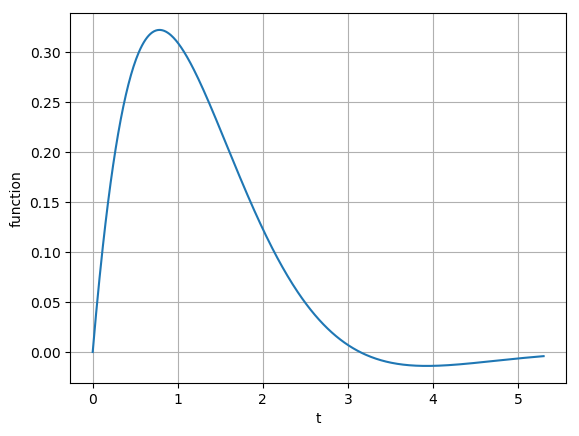

PyObject Text(24,0.5,'function')

In [27]:
x = a:0.01:b
y = sin.(x).*exp.(-x)
plot(x, y)
grid("on")
xlabel("t")
ylabel("function")

*Построим график зависимости значений интеграла от шага $h$.*

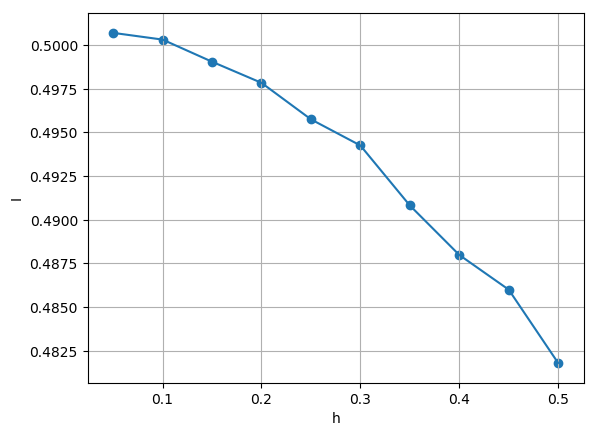

PyObject Text(24,0.5,'I')

In [28]:
h=0
mi=[]
mh=[]
for i=1:10
    h+=0.05
    a1=a
    b1=b
    In=0
    N=(b1-a1)/h
    x=a1:h:b1
    m=1
    push!(mh,h)
    while m<=N
        In+=0.5*h*(f(x[m+1],1)+f(x[m],1))
        m+=1
    end
    push!(mi,In)
end

plot(mh,mi)
scatter(mh,mi)
grid("on")
xlabel("h")
ylabel("I")

#### Решим систему методом наименьших невязок.
*Сначала зададим начальное приближение $X$, а так же матрицу $A$ и вектор $b$.  
Погрешность $\varepsilon=0.001$.*

In [29]:
E2=0.001
N=1000
Emat=eye(N)
X=ones(N)
Xk=zeros(N)
B=ones(N)

A=zeros(N,N)
for i=1:N
    B[i]=trap(i)
    for j=1:N
    A[i,j]=((j^3)*sin(j))/(1+i^2)
    end
end
A=Emat*N^4-A

function norm(vec)
    nn=0
    for i=1:length(vec)
        nn+=vec[i]^2
    end
    return sqrt(abs(nn))
end

function normMat(mat)
    return sqrt(eigmax((A')*A))
end

normMat (generic function with 1 method)

*Итерационный процесс в методе минимальных невязок имеет вид:  
$x^{k+1}=(E-\tau_k A)x^k+\tau_k Eb$  
где $\tau=\frac{(Ar^k,r^k)}{(Ar^k,Ar^k)}$ - итерационный параметр который выбирается из условия минимума нормы невязки на $k+1$ шаге.  
$H_k=\tau_k E$,  
$T_k=E-\tau_k A$.*

In [30]:
r1=zeros(N)
k=0
sk=[]
sX=[]
while(true)
    r=(A*X-B)
    Ar=A*r
    tauk=((Ar'r)/(Ar'Ar))
    Hk=tauk*Emat
    Tk=Emat-tauk*A
    Xk=Tk*X+Hk*B
    #Xk=X-((Ar'r)/(Ar'Ar))*r
    k+=1
    push!(sk,k)
    push!(sX,norm(Xk))
    if(norm(r1-r)<=abs(E2*normMat(Tk)/(1-normMat(Tk))))
        println("Number of iterations: ",k)
        break 
    else
        r1=r
        X=Xk
    end
end
Xk

Number of iterations: 5


1000-element Array{Float64,1}:
  4.29379e-13
  1.35891e-13
  5.27757e-14
  2.37694e-14
  1.17974e-14
  6.26168e-15
  3.49083e-15
  2.02095e-15
  1.20575e-15
  7.37402e-16
  4.60464e-16
  2.92714e-16
  1.88992e-16
  ⋮          
 -5.06783e-32
 -5.05759e-32
 -5.04739e-32
 -5.03722e-32
 -5.02707e-32
 -5.01696e-32
 -5.00688e-32
 -4.99682e-32
 -4.9868e-32 
 -4.97681e-32
 -4.96685e-32
 -4.95692e-32

*Построим график зависимости нормы решения $X$ от номера итерации $k$.*

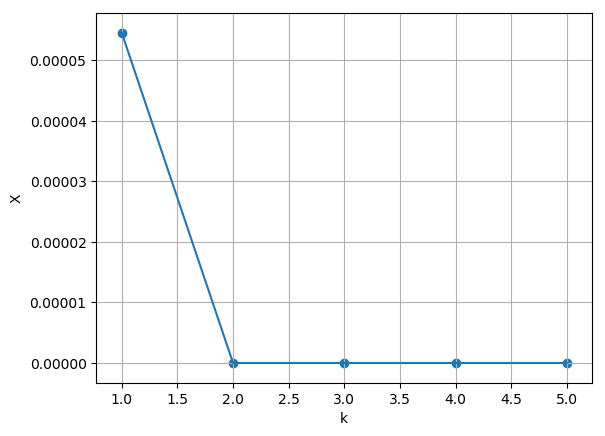

PyObject Text(24,0.5,'X')

In [31]:
plot(sk,sX)
scatter(sk,sX)
grid("on")
xlabel("k")
ylabel("X")

*Построим график $N$ решений.*

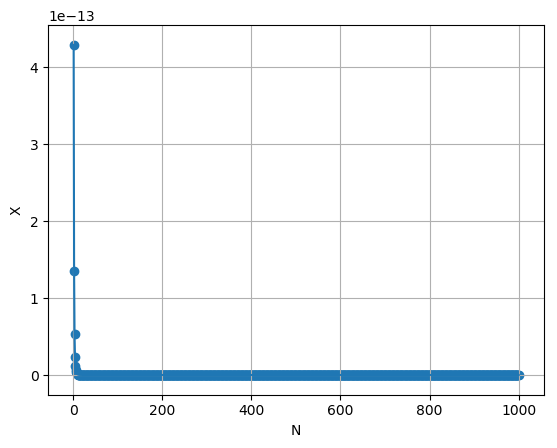

PyObject Text(24,0.5,'X')

In [32]:
NN=1:N
plot(NN,Xk)
scatter(NN,Xk)
grid("on")
xlabel("N")
ylabel("X")

*Найдем решение системы используя базовые фкнкции Julia и вычислим норму разности решений.*

In [33]:
XX=0
XX=A^(-1)*B

1000-element Array{Float64,1}:
  4.29379e-13
  1.35891e-13
  5.27757e-14
  2.37694e-14
  1.17974e-14
  6.26168e-15
  3.49083e-15
  2.02095e-15
  1.20575e-15
  7.37402e-16
  4.60464e-16
  2.92714e-16
  1.88992e-16
  ⋮          
 -5.06951e-32
 -5.05928e-32
 -5.04907e-32
 -5.0389e-32 
 -5.02875e-32
 -5.01864e-32
 -5.00856e-32
 -4.99851e-32
 -4.98848e-32
 -4.97849e-32
 -4.96853e-32
 -4.9586e-32 

In [34]:
norm(XX-Xk)

2.036474533609733e-28

### Вывод: Был вычислен интеграл методом трапеций и получено решение СЛУ методом минимальных невязок с начальным приближением [1,...,1] за 5 итераций.